In [1]:
# analyze and train
# load trajectories
from pathlib import Path
import pickle

import gymnasium as gym
from gymnasium import Env
import numpy as np

from minigrid.core.actions import Actions
from minigrid.minigrid_env import MiniGridEnv

env_id = "MiniGrid-Empty-16x16-v0"
data_path = Path.cwd().parents[0] / "data" / env_id

with open(data_path / "trajectories.pkl", "rb") as f:
    trajectories, rewards = pickle.load(f)

In [6]:
len(trajectories)

1000

[(0.0, 16.0),
 (0.0, 16.0),
 Text(0.5, 1.0, 'Trajectories'),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y')]

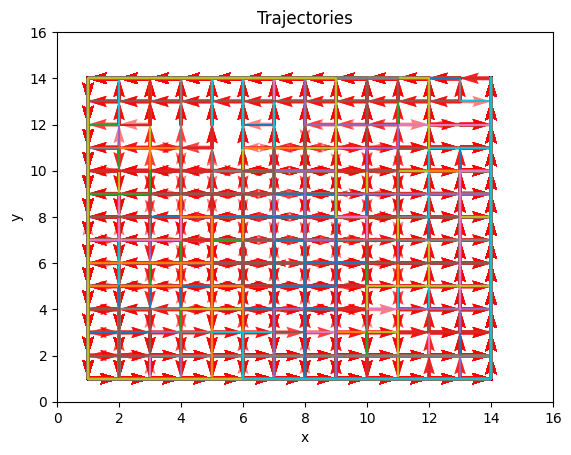

In [ ]:
# plot the trajectories as lines
import matplotlib.pyplot as plt

# flip the y axis
plt.gca().invert_yaxis()

for i, trajectory in enumerate(trajectories):
    xs, ys = trajectory[:, 0], trajectory[:, 1]
    plt.plot(xs, ys)
    plt.quiver(xs[:-1], ys[:-1], xs[1:] - xs[:-1], ys[1:] - ys[:-1], scale_units='xy', angles='xy', scale=1, color='r', alpha=0.5)

plt.gca().set(xlim=(0, 16), title="Trajectories", xlabel="x", ylabel="y")


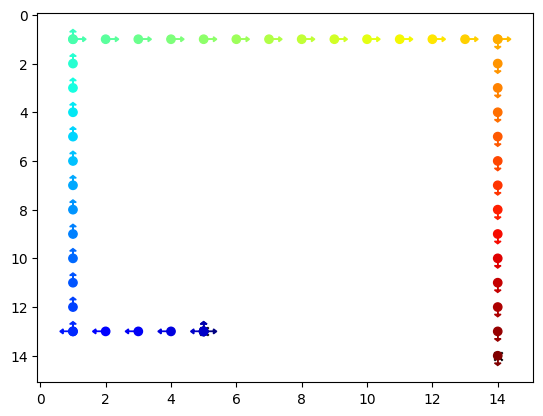

In [24]:
plt.clf()
trajectory = trajectories[0]
observations = trajectory[:, :3]
path_length = len(observations)
# flip direction of y 
plt.gca().invert_yaxis()
colors = plt.cm.jet(np.linspace(0,1,path_length))
plt.scatter(observations[[0, -1],0], observations[[0,-1],1], c='black', zorder=10, marker='x')
plt.scatter(observations[:,0], observations[:,1], c=colors, zorder=20)
# td: plot arrows in the direction of the orientation
for i, (x, y, direction) in enumerate(observations):
    angle = direction * np.pi / 2
    head_length = 0.3
    plt.arrow(x, y, head_length * np.cos(angle), head_length * np.sin(angle), color=colors[i], head_width=0.2, head_length=0.1)
    

In [2]:
env = gym.make(env_id, render_mode="rgb_array")

env.reset()
img = env.render()

In [16]:
base_env = env.unwrapped
base_env.reset()
base_env.step(Actions.right)
print(base_env.agent_dir)
print(base_env.agent_pos)
base_env.step(Actions.forward)
print(base_env.agent_pos)


1
(1, 1)
(1, 2)


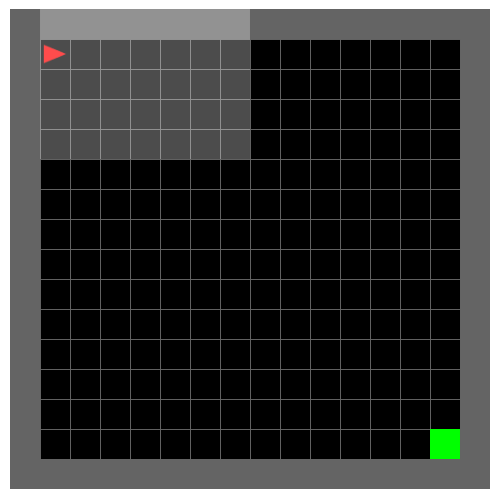

In [8]:
img.shape
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])


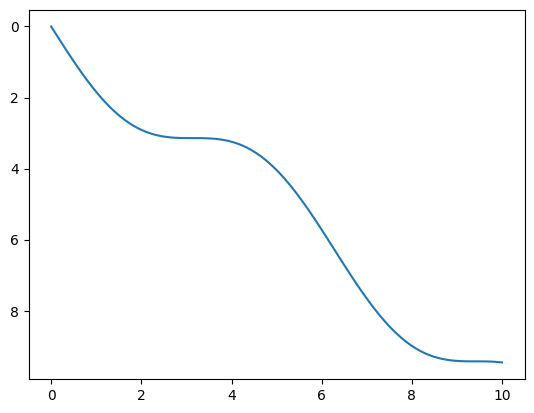

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot some demo data
x = np.linspace(0, 10, 100)
y = np.sin(x) + x

plt.gca().invert_yaxis()
plt.plot(x, y)